In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
!pip install -q japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
plt.style.use('bmh') # matplotlib のスタイルの設定

1

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/データ分析/Sample 01.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   No      10 non-null     object
 1   販促前     10 non-null     int64 
 2   販促後     10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [6]:
df.describe()

,販促前,販促後
count,10.00000,10.000000
mean,79.20000,82.700000
std,13.94274,13.573258
min,64.00000,68.000000
25%,69.75000,73.000000
50%,78.50000,81.500000
75%,82.50000,86.500000
max,110.00000,114.000000


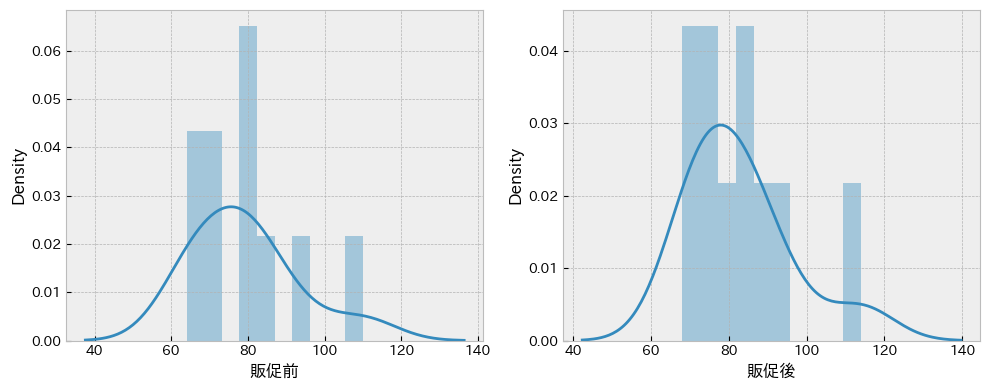

In [7]:
# 正規生（正規分布か）を可視化して確認
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['販促前'], bins = 10)
plt.subplot(1, 2, 2)
sns.distplot(df['販促後'], bins = 10)
plt.tight_layout()
plt.show()

正規性の検定
  - シャピロ・ウィルク検定
    - サンプル数が小さいとき
  - コルモゴロフ・スミルノフ検定
    - サンプル数が大きいとき
    
- 帰無仮説：正規分布である（pvalueが0.05以上）
- 対立仮説：正規分布でない

In [8]:
# シャピロ・ウィルク検定(サンプル数が小さいから)
static, pvalue = stats.shapiro(df['販促前'])
pvalue # 0.05を超えていれば正規分布と仮定できる

0.23636476695537567

In [9]:
static, pvalue = stats.shapiro(df['販促後'])
pvalue

0.10092635452747345

対応ある２標本のt検定
- 仮説立て
  - 帰無仮説：２郡間の平均値に差はない
  - 対立仮説：２郡間の平均値に差がある
- 有意水準
  - 5%
- p値
  - 0.0005510378621158206 < 0.05

- 判定
  - 帰無仮説を棄却する
  - ２郡間の平均値に差がある

In [10]:
stats.ttest_rel(df['販促前'], df['販促後']) # rel -> related

TtestResult(statistic=-5.217491947499509, pvalue=0.0005510378621158206, df=9)

2

In [11]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/データ分析/Sample 02.csv')

In [12]:
df

,No,新宿エリア,渋谷エリア
0,1,440,325
1,2,480,934
2,3,525,458
3,4,691,982
4,5,737,340
5,6,725,340
6,7,734,382
7,8,502,820
8,9,763,963
9,10,973,673


In [13]:
df.mean()

No         5.5
新宿エリア    657.0
渋谷エリア    621.7
dtype: float64

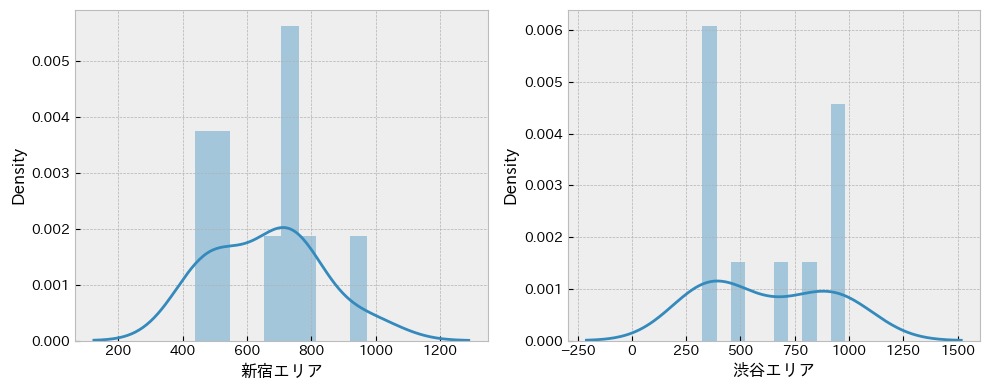

ShapiroResult(statistic=0.91079181432724, pvalue=0.28647446632385254)
ShapiroResult(statistic=0.8306179642677307, pvalue=0.03403907269239426) 正規分布ではない


In [14]:
# 正規生（正規分布か）を可視化して確認
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['新宿エリア'], bins = 10)
plt.subplot(1, 2, 2)
sns.distplot(df['渋谷エリア'], bins = 10)
plt.tight_layout()
plt.show()

print(stats.shapiro(df['新宿エリア']))
print(stats.shapiro(df['渋谷エリア']), '正規分布ではない')

- 仮説立て
  - 帰無仮説：２郡間の平均値に差がない
  - 対立仮説：２郡間の平均値に差がある
- 有意水準
  - 5%
- p値
  - 0.570605503511469 > 0.05

- 判定
  - 帰無仮説を棄却できない


In [15]:
# マンホイットニーのu検定
stats.mannwhitneyu(df['新宿エリア'], df['渋谷エリア'], alternative = 'two-sided')

MannwhitneyuResult(statistic=58.0, pvalue=0.570605503511469)

3

In [16]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/データ分析/Sample 03.csv')

In [17]:
df.mean()

クラスA    56.4
クラスB    71.5
dtype: float64

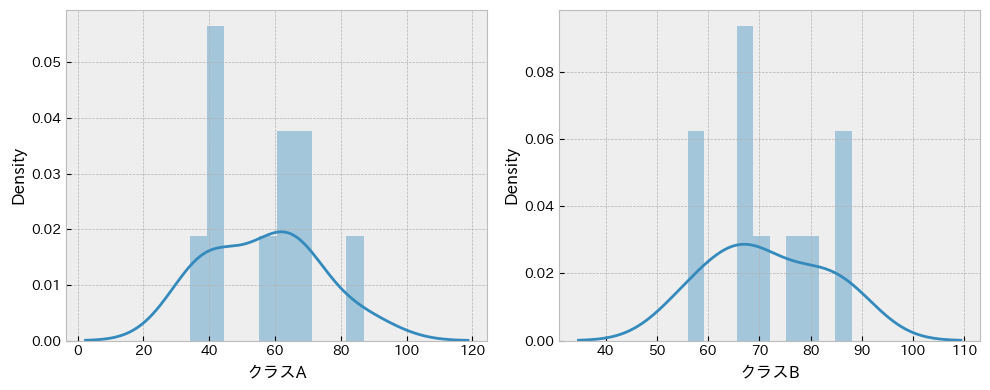

ShapiroResult(statistic=0.9310209155082703, pvalue=0.4580090343952179)
ShapiroResult(statistic=0.9270762205123901, pvalue=0.4197576642036438)


In [18]:
# 正規生（正規分布か）を可視化して確認
plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
sns.distplot(df['クラスA'], bins = 10)
plt.subplot(1, 2, 2)
sns.distplot(df['クラスB'], bins = 10)
plt.tight_layout()
plt.show()

print(stats.shapiro(df['クラスA']))
print(stats.shapiro(df['クラスB']))

- 分散が等しいか(F検定)
  - 帰無仮説：すべての群に対して母分散は等しい
  - 対立仮説：いずれかの母分散が異なる
- バートレット検定

In [20]:
stats.bartlett(df['クラスA'], df['クラスB']) # pvalue > 0.05　より、帰無仮説を採用（等分散）

BartlettResult(statistic=1.288219203548453, pvalue=0.2563763882769976)

- 仮説立て
  - 帰無仮説：2郡間の平均値に差がない
  - 対立仮説：差がある
- 有意水準
  - 5%
- p値
  - 0.029155056786197644 < 0.05
- 判定
  - 帰無仮説を棄却

In [21]:
# スチューデントのt検定
stats.ttest_ind(df['クラスA'], df['クラスB'], equal_var = True) # ind : independent (不等分散なら equal_var = False)

TtestResult(statistic=-2.370168982305104, pvalue=0.029155056786197644, df=18.0)

4

## 独立性の検定
- x二乗検定（カテゴリ変数を持つ郡ついての比較）
1. 仮説設定
2. 有意水準決定
3. x二乗値からp値を求める
4. 判定

- 仮説立て
  - 帰無仮説：２郡間は独立
  - 対立仮説：独立ではない（関連がある）


In [24]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI・データサイエンス実践プログラム/データ分析/Sample 04.csv')

In [25]:
df.head()

,性別,サンドイッチ
0,男性,ハムサンド
1,女性,サラダサンド
2,男性,ハムサンド
3,女性,ハムサンド
4,男性,ハムサンド


In [28]:
# クロス集計
crosstab = pd.crosstab(df['性別'], df['サンドイッチ'])

- 仮説立て
  - 帰無仮説：２郡間は独立
  - 対立仮説：独立ではない（関連がある）
- 有意水準
  - 5%
- p値
  - 0.74 > 0.05
- 判定
  - 帰無仮説を棄却できない

In [30]:
chi2, p, dof, ef = stats.chi2_contingency(crosstab, correction = False)

In [31]:
p

0.7494647665797038